# Acute Inflammations

In [1]:
import warnings

warnings.simplefilter('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
columns = [
    'Temperature of Patient',
    'Occurence of Nausea',
    'Lumbar Pain',
    'Urine Pushing',
    'Micturition Pain',
    'Buring, itch, or swelling of urethra outlet',
    'd1 decision',
    'd2 decision'
]

In [4]:
data = pd.read_csv('diagnosis.data', header = None, sep = '\t', encoding = 'utf-16', names = columns)

In [5]:
data.head()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pain,"Buring, itch, or swelling of urethra outlet",d1 decision,d2 decision
0,"35,5",no,yes,no,no,no,no,no
1,"35,9",no,no,yes,yes,yes,yes,no
2,"35,9",no,yes,no,no,no,no,no
3,"36,0",no,no,yes,yes,yes,yes,no
4,"36,0",no,yes,no,no,no,no,no


In [6]:
data.get_dtype_counts()

object    8
dtype: int64

In [7]:
data[columns[0]] = data[columns[0]].str.replace(',','.')

In [8]:
data[columns[0]] = data[columns[0]].astype(np.float32)

In [9]:
def label_encoding(x):
    return 1 if x == 'yes' else 0

In [10]:
for i in range(1,8):
    data[columns[i]] = data[columns[i]].apply(label_encoding).astype(np.int8)

In [11]:
data.head()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pain,"Buring, itch, or swelling of urethra outlet",d1 decision,d2 decision
0,35.500000,0,1,0,0,0,0,0
1,35.900002,0,0,1,1,1,1,0
2,35.900002,0,1,0,0,0,0,0
3,36.000000,0,0,1,1,1,1,0
4,36.000000,0,1,0,0,0,0,0


In [12]:
data.get_dtype_counts()

float32    1
int8       7
dtype: int64

we will be predicting decision d1 i.e, inflammations of urinary bladders

In [13]:
data.describe()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pain,"Buring, itch, or swelling of urethra outlet",d1 decision,d2 decision
count,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000,120.000000
mean,38.724167,0.241667,0.583333,0.666667,0.491667,0.416667,0.491667,0.416667
std,1.819133,0.429888,0.495074,0.473381,0.502027,0.495074,0.502027,0.495074
min,35.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.099998,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.950001,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,40.599998,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,41.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


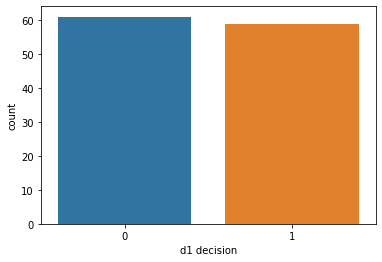

In [14]:
#let's see class distribution
sns.countplot(data['d1 decision'])

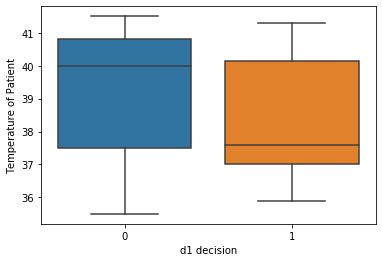

In [15]:
sns.boxplot(x = 'd1 decision', y = 'Temperature of Patient', data=data)

In [16]:
#we will be just predicting decision 1
data.drop(['d2 decision'], axis = 1, inplace = True)

In [17]:
data.head()

,Temperature of Patient,Occurence of Nausea,Lumbar Pain,Urine Pushing,Micturition Pain,"Buring, itch, or swelling of urethra outlet",d1 decision
0,35.500000,0,1,0,0,0,0
1,35.900002,0,0,1,1,1,1
2,35.900002,0,1,0,0,0,0
3,36.000000,0,0,1,1,1,1
4,36.000000,0,1,0,0,0,0


In [18]:
data.get_dtype_counts()

float32    1
int8       6
dtype: int64

(array([ 6.,  7., 21., 21.,  9.,  4.,  1., 13., 16., 22.]),
 array([35.5, 36.1, 36.7, 37.3, 37.9, 38.5, 39.1, 39.7, 40.3, 40.9, 41.5],
       dtype=float32),
 <a list of 10 Patch objects>)

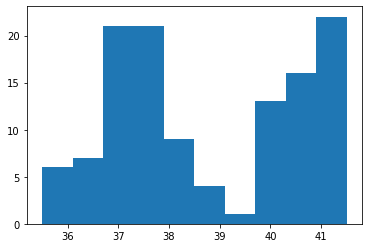

In [19]:
plt.hist(data['Temperature of Patient'])

In [20]:
data.shape

(120, 7)

In [21]:
X, y = data.iloc[:,:-1].values, data.iloc[:,-1].values

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, stratify = y, test_size = 0.2)

In [24]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
model = RandomForestClassifier(n_estimators=10, n_jobs=-1, random_state = 42)

In [26]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [27]:
model.score(X_test, y_test)

1.0

In [28]:
model.score(X_train, y_train)

1.0

In [29]:
from sklearn.model_selection import GridSearchCV

In [30]:
params = {
    'criterion':['gini', 'entropy'],
    'n_estimators':[10,20,30,50]
}

In [31]:
tuning = GridSearchCV(
            estimator=model,
            param_grid=params,
            scoring='accuracy',
            cv = 10,
            n_jobs = -1
)

In [32]:
tuning.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=-1,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='war

In [33]:
tuning.best_score_

1.0

In [34]:
tuning.best_params_

{'criterion': 'gini', 'n_estimators': 10}

In [35]:
model = tuning.best_estimator_

In [36]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
                       oob_score=False, random_state=None, verbose=0,
                       warm_start=False)

In [38]:
temp_columns = np.array(columns[:-2])

In [39]:
sort_index = np.argsort(model.feature_importances_)[::-1]
temp_columns = temp_columns[sort_index]

In [40]:
temp_columns

array(['Urine Pushing', 'Micturition Pain', 'Temperature of Patient',
       'Lumbar Pain', 'Occurence of Nausea',
       'Buring, itch, or swelling of urethra outlet'], dtype='<U43')

<BarContainer object of 6 artists>

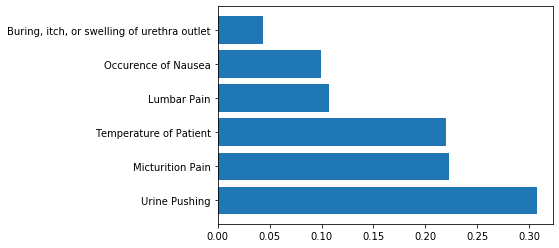

In [41]:
plt.barh(temp_columns, np.sort(model.feature_importances_)[::-1])

In [44]:
import pickle

In [46]:
import os

In [52]:
pickle.dump(model, open(os.path.join(os.getcwd(),'model','')))

TypeError: file must have a 'write' attribute